In [1]:
from highlight_text import ax_text,fig_text
import mplsoccer
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import numpy as np
from highlight_text import htext

from scrape import scrape_data_fbref as fbref
from scrape import scrape_data_understat as understat

In [2]:

df_fbref = fbref.readfromhtml('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')
no_90s = 5
df_fil = df_fbref[df_fbref['90s']>=no_90s] # select player that have played more than 5 games
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW','MF,FW','FW,MF'])] # select only fowards


#select a specific nationalty
#nationality = 'POR'
#df_portuguese = df_fbref[df_fbref['Nation'] == nationality]
#x,y = (df_portuguese['xG']/df_portuguese['90s']).to_list(), (df_portuguese['Gls']/df_portuguese['90s']).to_list()
df_fil

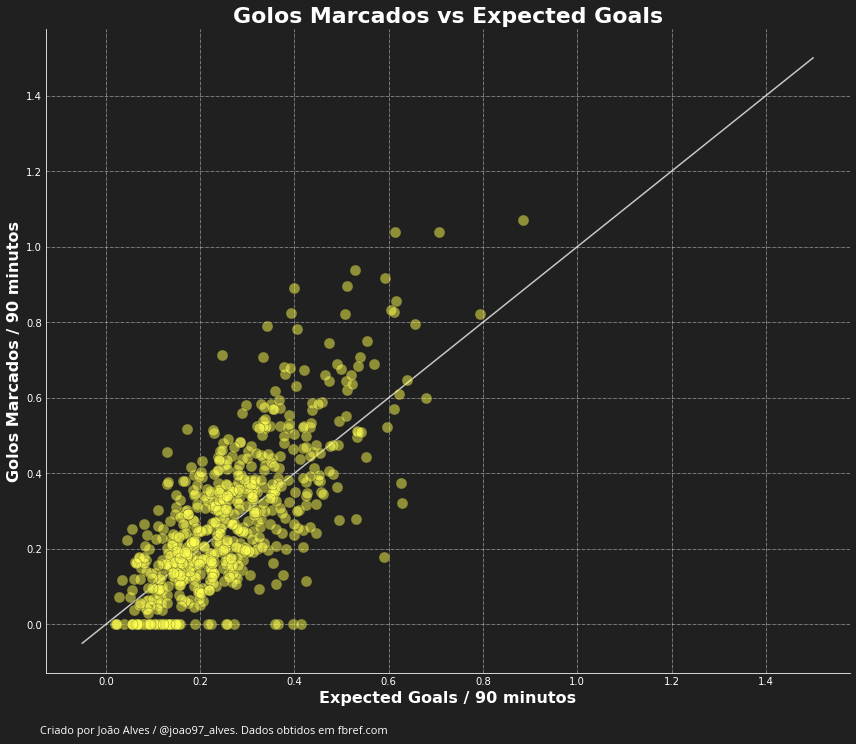

In [23]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "w"
background = "#202020"
filler = "#FFFF50"
primary = "#FF3333"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10


fig, ax = plt.subplots(figsize=(12,10))
fig.set_facecolor(background)
ax.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="-.",lw="0.5",color="lightgrey", zorder=1)

# plot line y=x
ax.plot([-0.05, 1.5], [-0.05, 1.5], 'k-', alpha=0.75, zorder=2, color="w")

x = (df_fil['npxG']/df_fil['90s']).to_list()
y = (df_fil['Gls']/df_fil['90s']).to_list()
ax.scatter(x,y,s=120,color=filler,edgecolors=background, alpha=0.5, lw=0.5, zorder=3)

#title + labels
ax.set_title("Golos Marcados vs Expected Goals" ,fontsize=22, fontfamily=title_font,color=text_color, fontweight = 'bold')
ax.set_xlabel("Expected Goals / 90 minutos", fontfamily=title_font, fontweight="bold", fontsize=16, color=text_color)
ax.set_ylabel("Golos Marcados / 90 minutos", fontfamily=title_font, fontweight="bold", fontsize= 16, color=text_color)

ax.tick_params(axis="both",length=0)
spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color("white")


fig.text(0.05, -0.025, "Criado por João Alves / @joao97_alves. Dados obtidos em fbref.com",
        fontsize=11, fontfamily=body_font, color=text_color)

plt.tight_layout()
#plt.show()
#plt.savefig("ok2.png", bbox_inches='tight', dpi=300)



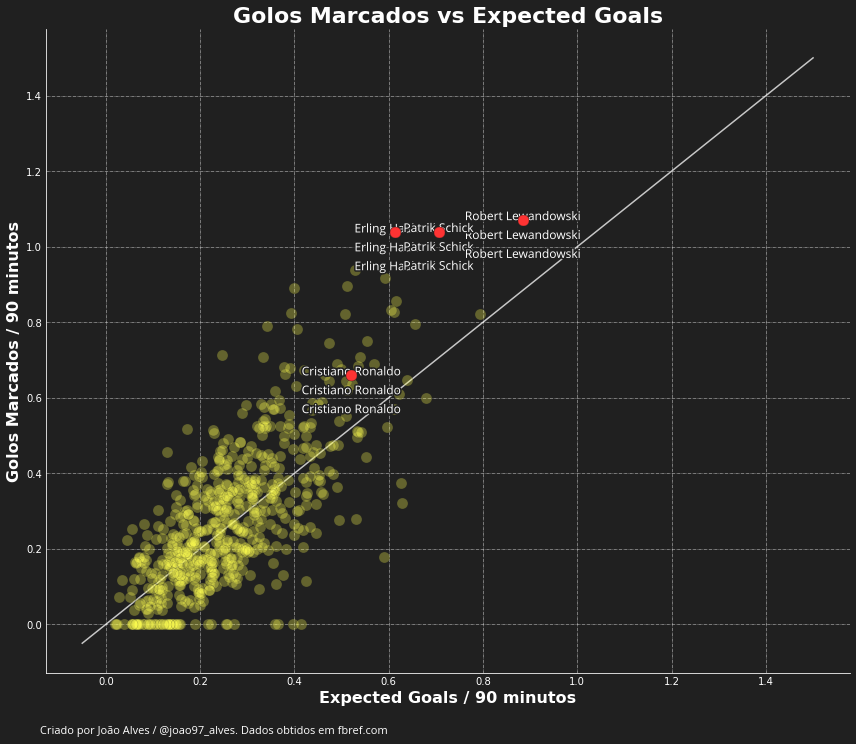

In [20]:
def plot_specific_point(name):
    df_player = df_fil[df_fil['Player']==name]
    x_player, y_player = df_player['npxG']/df_player['90s'], df_player['Gls']/df_player['90s']

    #plot a specific point for a specific player
    ax.scatter(x_player,y_player,s=120,color=primary,edgecolors=background, alpha=1, lw=.25, zorder=4)
    t = ax.text(x_player,y_player, name,color=text_color,fontsize=12, ha="center", fontfamily=body_font)
    t.set_path_effects([path_effects.withStroke(linewidth=3,foreground=background)])

plot_specific_point('Robert Lewandowski')
plot_specific_point('Erling Haaland')
plot_specific_point('Patrik Schick')
plot_specific_point('Cristiano Ronaldo')

fig

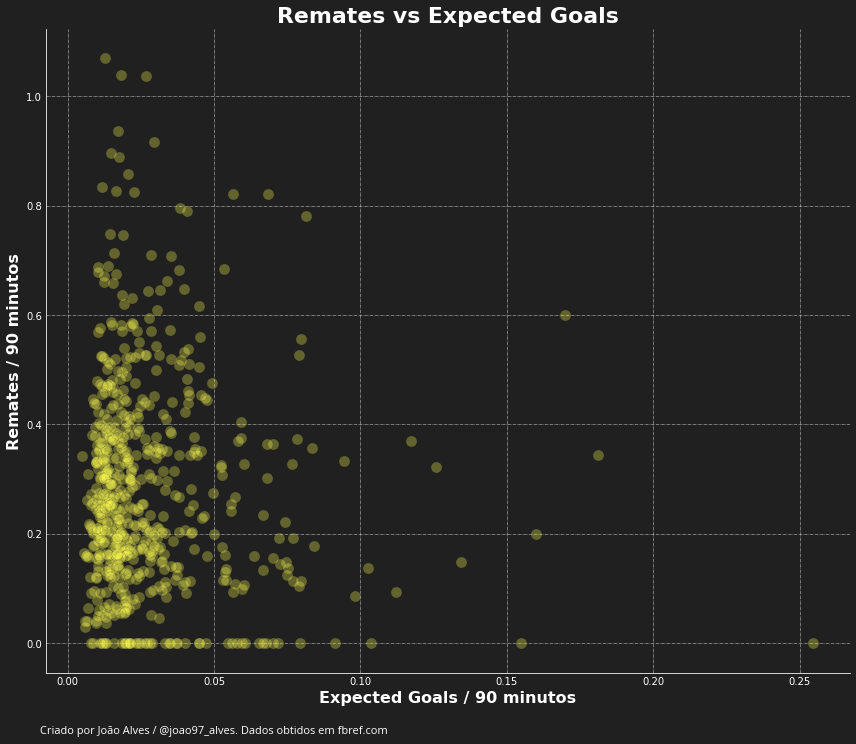

In [12]:
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10


fig, ax = plt.subplots(figsize=(12,10))
fig.set_facecolor(background)
ax.set_facecolor('#808080')
ax.patch.set_alpha(0)

ax.grid(ls="-.",lw="0.5",color="lightgrey", zorder=1)


x = ((df_fil['xG']/df_fil['SoT'])/df_fil['90s']).to_list()
y = (df_fil['Gls']/df_fil['90s']).to_list()
#ax.invert_xaxis()
ax.scatter(x,y,s=120,color=filler,edgecolors=background, alpha=0.3, lw=0.5, zorder=3)

#title + labels
ax.set_title("Remates vs Expected Goals" ,fontsize=22, fontfamily=title_font,color=text_color, fontweight = 'bold')
ax.set_xlabel("Expected Goals / 90 minutos", fontfamily=title_font, fontweight="bold", fontsize=16, color=text_color)
ax.set_ylabel("Remates / 90 minutos", fontfamily=title_font, fontweight="bold", fontsize= 16, color=text_color)

ax.tick_params(axis="both",length=0)
spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color("white")


fig.text(0.05, -0.025, "Criado por João Alves / @joao97_alves. Dados obtidos em fbref.com",
        fontsize=11, fontfamily=body_font, color=text_color)

plt.tight_layout()

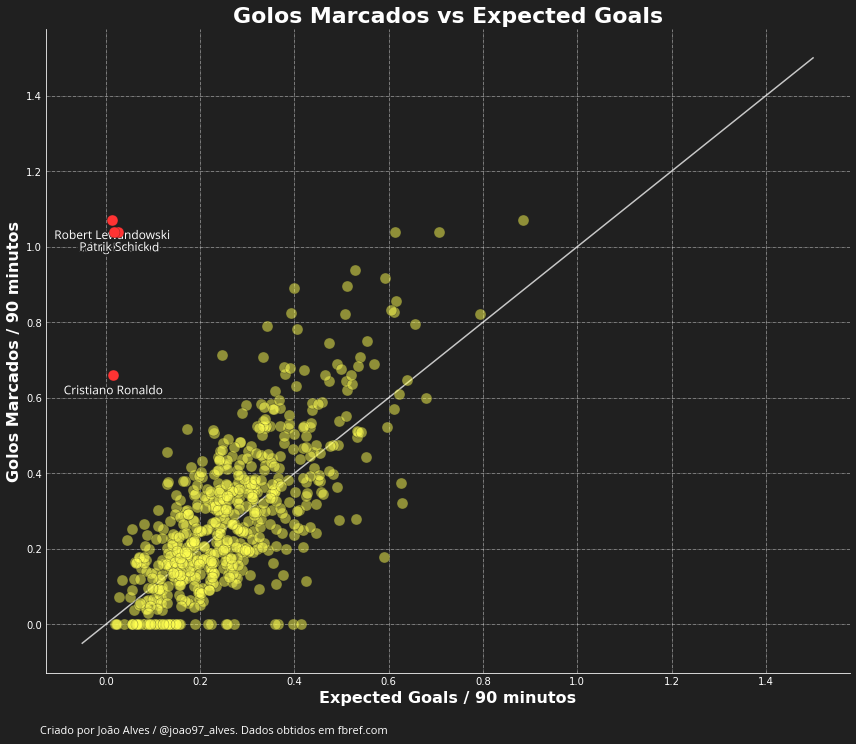

In [24]:
def plot_specific_point(name):
    df_player = df_fil[df_fil['Player']==name]
    x_player, y_player = ((df_player['xG']/df_player['SoT'])/df_player['90s']), df_player['Gls']/df_player['90s']

    #plot a specific point for a specific player
    ax.scatter(x_player,y_player,s=120,color=primary,edgecolors=background, alpha=1, lw=.25, zorder=4)
    t = ax.text(x_player,y_player-0.05, name,color=text_color,fontsize=12, ha="center", fontfamily=body_font)
    t.set_path_effects([path_effects.withStroke(linewidth=3,foreground=background)])

plot_specific_point('Robert Lewandowski')
plot_specific_point('Erling Haaland')
plot_specific_point('Patrik Schick')
plot_specific_point('Cristiano Ronaldo')

fig

findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.


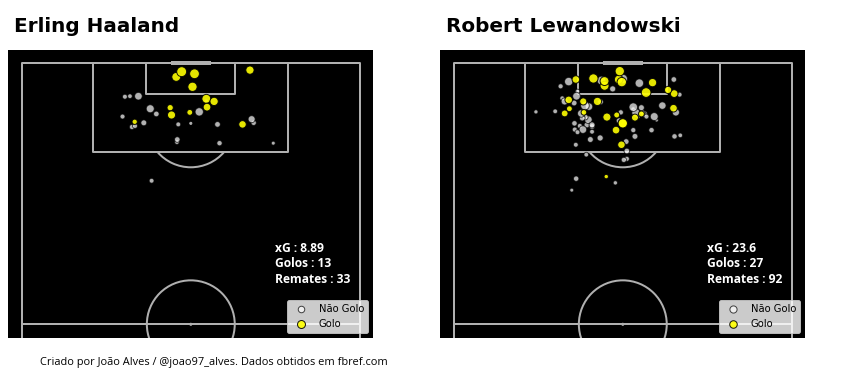

In [25]:
from highlight_text import ax_text,fig_text

def draw_xG_pitch(df, ax):
    #SETTING UP THE MPL AXIS FOR THE FIRST SEASON
    pitch = mplsoccer.VerticalPitch(half=True,pitch_type='opta', pitch_color='black')
    ax.patch.set_facecolor(background)
    pitch.draw(ax=ax)

    #PLOTTING OTHER SHOTS
    pitch.scatter(df[df['Result']!='Goal']['X'],
                df[df['Result']!='Goal']['Y'],
                s=np.sqrt(df[df['Result']!='Goal']['xG'])*100,
                marker='o',
                alpha=0.7,
                edgecolor='black',
                facecolor='white',
                ax=ax,
                label='Não Golo'
    )

    pitch.scatter(df[df['Result']=='Goal']['X'],
                df[df['Result']=='Goal']['Y'],
                s=np.sqrt(df[df['Result']=='Goal']['xG'])*100,
                marker='o',
                alpha=0.9,
                edgecolor='black',
                facecolor='yellow',
                ax=ax,
                label='Golo'
    )

    # ADDING THE LEGEND
    ax.legend(loc='lower right').get_texts()[0].set_color("black")
    ax.text(25,61,'Golos : '+str(len(df[df['Result']=='Goal'])), weight='bold', size=12, color='white', fontfamily=body_font)
    ax.text(25,64,f"xG : {round(sum(df['xG']),2)}", weight='bold', size=12, color='white', fontfamily=body_font)
    ax.text(25,58,'Remates : '+str(len(df)), weight='bold', size=12, color='white', fontfamily=body_font)

# SETTING UP THE AXES
fig, ax = plt.subplots(figsize=(12,5))
ax.axis('off')
fig.set_facecolor("white")

df_understat = understat.readfromurl("https://understat.com/player/8260")

ax_opta1 = fig.add_axes([0, 0.05, 0.45, 0.8])
df_fil = df_understat.loc[df_understat['Season']==2019]
draw_xG_pitch(df_fil, ax_opta1)
fig.text(0.02, 0.9, "Erling Haaland", weight="bold", fontsize=20, fontfamily=title_font, color="black")
ax_opta2 = fig.add_axes([0.5, 0.05, 0.45, 0.8])
df_fil = df_understat.loc[df_understat['Season']==2020]
draw_xG_pitch(df_fil, ax_opta2)
fig.text(0.52, 0.9, "Robert Lewandowski", weight="bold", fontsize=20, fontfamily=title_font, color="black")


# ADDING INFO
fig.text(0.05, -0.025, "Criado por João Alves / @joao97_alves. Dados obtidos em fbref.com",
        fontsize=11, fontfamily=body_font, color="black")

plt.tight_layout()
plt.savefig("ok2.png", bbox_inches='tight', dpi=300) 